In [1]:
dataset_path = "./dataset"

In [26]:
print(os.listdir(dataset_path))

['images']


In [3]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.keras import optimizers, models, layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import load_model

In [6]:
base_dir = dataset_path + '/images'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 240,
)
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 240,
)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 100),
    batch_size = 8,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size= 8,
    class_mode='binary',
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (100, 100),
    batch_size = 8,
    class_mode = 'binary'
)

Found 1680 images belonging to 2 classes.
Found 360 images belonging to 2 classes.
Found 360 images belonging to 2 classes.


<Figure size 640x480 with 0 Axes>

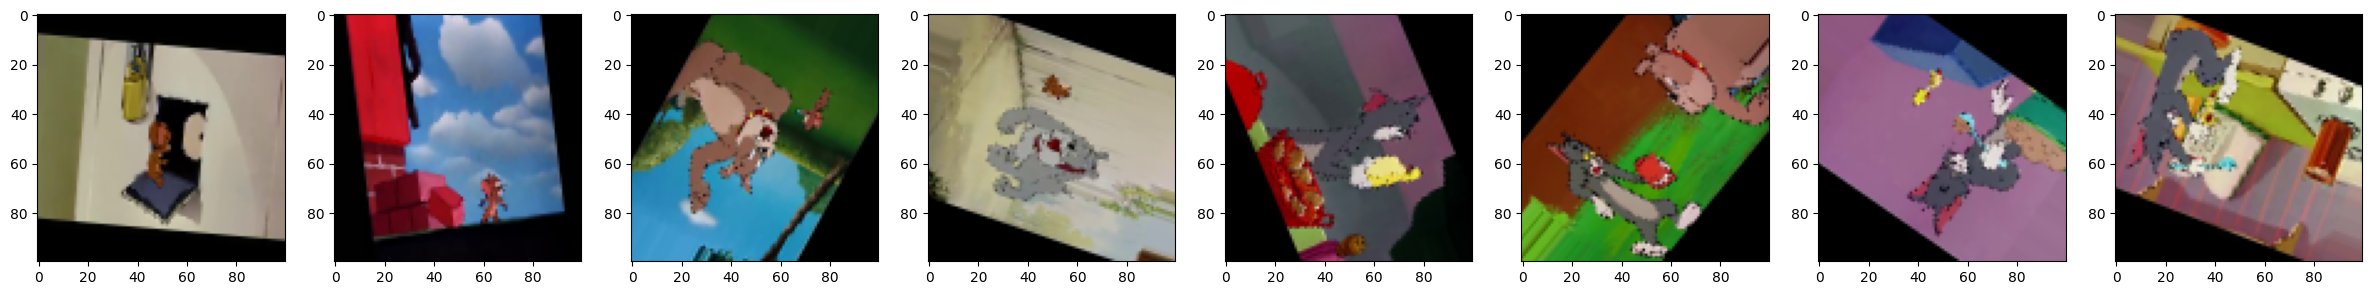

In [9]:
images, labels = train_generator[0]

plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30,4))
for i in range(images.shape[0]):
    axarr[i].imshow(images[i])
plt.show()

Original model

In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
base_model.trainable = False

In [17]:
def get_model_compiled():
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu', name='dense1'),
        layers.Dense(1, activation='sigmoid', name='output')
    ])

    model.compile(
        optimizer=optimizers.RMSprop(learning_rate=2e-5),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

model = get_model_compiled()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 3, 3, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,894,849 (60.63 MB)

 Trainable params: 1,180,161 (4.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10


c:\Users\José Eduardo Díaz\Desktop\mini-proyectos\python\Image Classification\Saiyan_Classification_Model\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


210/210 ━━━━━━━━━━━━━━━━━━━━ 26s 123ms/step - accuracy: 0.5780 - loss: 0.6826 - val_accuracy: 0.6250 - val_loss: 0.6425
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 27s 129ms/step - accuracy: 0.7418 - loss: 0.5572 - val_accuracy: 0.6583 - val_loss: 0.6119
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 27s 130ms/step - accuracy: 0.7688 - loss: 0.5061 - val_accuracy: 0.6722 - val_loss: 0.6114
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 27s 131ms/step - accuracy: 0.8074 - loss: 0.4551 - val_accuracy: 0.7139 - val_loss: 0.5812
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 27s 131ms/step - accuracy: 0.8307 - loss: 0.4163 - val_accuracy: 0.7028 - val_loss: 0.5903
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 27s 130ms/step - accuracy: 0.8375 - loss: 0.4111 - val_accuracy: 0.6750 - val_loss: 0.5843
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.8370 - loss: 0.3996 - val_accuracy: 0.7056 - val_loss: 0.5690
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 28s 132ms/step - accuracy: 0.8449 - loss: 0.3783 - val

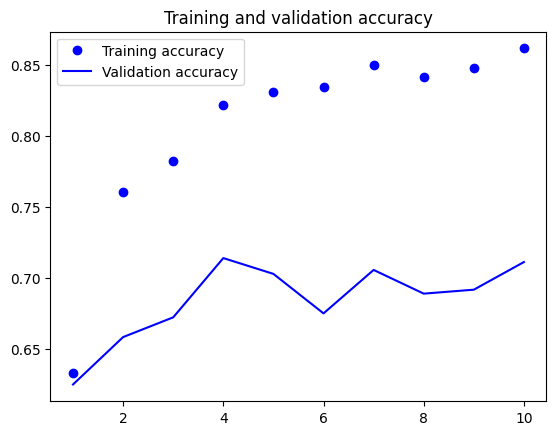

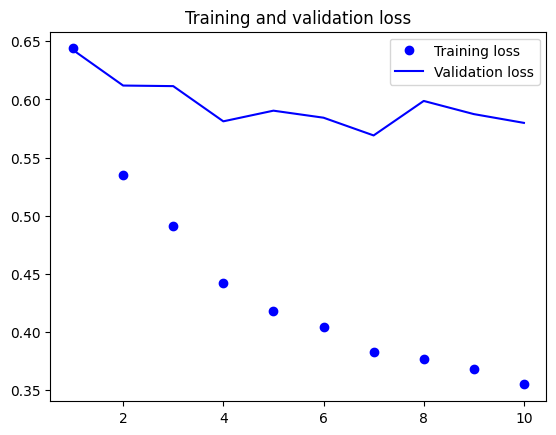

In [ ]:
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [146]:
model.save('original_model.h5') 

In [10]:
model = load_model('original_model.h5')

In [9]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

c:\Users\José Eduardo Díaz\Desktop\mini-proyectos\python\Image Classification\Saiyan_Classification_Model\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.8171 - loss: 0.4176
Test accuracy: 0.7972221970558167
Test loss: 0.4399639070034027


In [11]:
def model_analysis(model, test_generator, class_0, class_1):
    predictions = model.predict(test_generator)
    predicted = (predictions > 0.5).astype(int).flatten()
    truth = test_generator.classes

    TP = TN = FP = FN = 0

    for i in range(len(truth)):
        if predicted[i] == 1:
            if truth[i] == 1:
                TP += 1
            else:
                FP += 1
        else: 
            if truth[i] == 0:
                TN += 1
            else:
                FN += 1

    print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

    cmatrix = np.array([[TN, FP], [FN, TP]])
    class_names = [class_0, class_1]

    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cmatrix, cmap='Blues')

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Real class')

    for i in range(2):
        for j in range(2):
            ax.text(j, i, cmatrix[i, j], ha='center', va='center', color='black', fontsize=12)

    plt.title('Confusion Matrix')
    plt.colorbar(im)
    plt.tight_layout()
    plt.show()

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"\nPrecisión: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1_score:.3f}")


In [12]:
classes = list(test_generator.class_indices.keys())

c:\Users\José Eduardo Díaz\Desktop\mini-proyectos\python\Image Classification\Saiyan_Classification_Model\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step
TP: 64, TN: 111, FP: 69, FN: 116


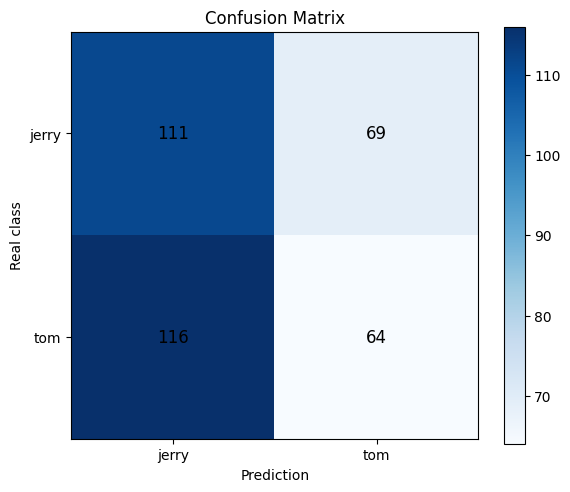


Precisión: 0.481
Recall: 0.356
F1-score: 0.409


In [13]:
model_analysis(model, test_generator, class_0=classes[0], class_1=classes[1])

Improved model 

In [14]:
modified_train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 100),
    batch_size = 8,
    class_mode = 'categorical',
)

modified_test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size= 8,
    class_mode='categorical',
)

modified_validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (100, 100),
    batch_size = 8,
    class_mode = 'categorical',
)

Found 1680 images belonging to 2 classes.
Found 360 images belonging to 2 classes.
Found 360 images belonging to 2 classes.


In [15]:
base_model_19 = VGG19(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
base_model_19.trainable = False

def get_model_19_compiled():

    model = models.Sequential([
        base_model_19,
        layers.Flatten(),
        layers.Dense(512, activation='relu', name='dense_layer1'),
        layers.Dense(256, activation='relu', name='dense_layer2'),
        layers.Dense(2, activation='softmax', name='output'),

    ])

    model.compile(
        optimizer=optimizers.RMSprop(learning_rate=1e-5),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

improved_model = get_model_19_compiled()
improved_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 3, 3, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer1 (Dense)            │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,516,034 (85.89 MB)

 Trainable params: 2,491,650 (9.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

c:\Users\José Eduardo Díaz\Desktop\mini-proyectos\python\Image Classification\Saiyan_Classification_Model\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 46s 213ms/step - accuracy: 0.6237 - loss: 0.6649 - val_accuracy: 0.6778 - val_loss: 0.6263
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 39s 186ms/step - accuracy: 0.7177 - loss: 0.5853 - val_accuracy: 0.6778 - val_loss: 0.6058
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 38s 179ms/step - accuracy: 0.7492 - loss: 0.5339 - val_accuracy: 0.6972 - val_loss: 0.5919
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 43s 203ms/step - accuracy: 0.7968 - loss: 0.4806 - val_accuracy: 0.7083 - val_loss: 0.5614
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 40s 189ms/step - accuracy: 0.8028 - loss: 0.4673 - val_accuracy: 0.6806 - val_loss: 0.5821
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 42s 200ms/step - accuracy: 0.8136 - loss: 0.4327 - val_accuracy: 0.6944 - val_loss: 0.5757
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 39s 187ms/step - accuracy: 0.8200 - loss: 0.4346 - val_accuracy: 0.6944 - val_loss: 0.5830
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 37s 177ms/step - accuracy: 0.8413 - loss: 0

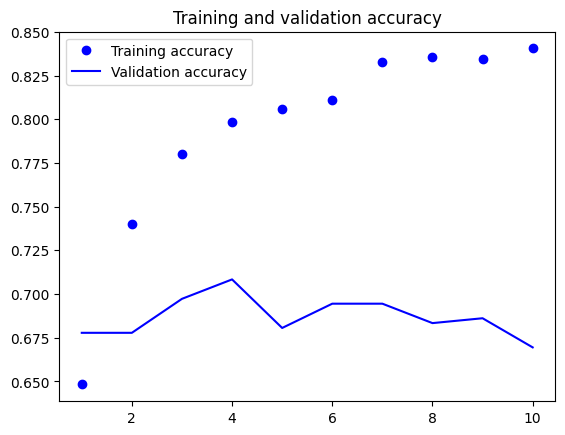

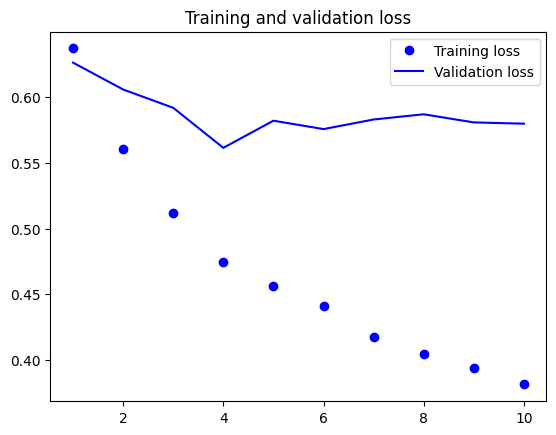

In [16]:
second_history = improved_model.fit(
    modified_train_generator,
    epochs = 10,
    validation_data = modified_validation_generator,
)

second_train_acc = second_history.history['accuracy']
second_val_acc = second_history.history['val_accuracy']
second_train_loss = second_history.history['loss'] 
second_val_loss = second_history.history['val_loss']

second_epochs = range(1, len(second_train_acc) + 1)

plt.plot(second_epochs, second_train_acc, 'bo', label='Training accuracy')
plt.plot(second_epochs, second_val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(second_epochs, second_train_loss, 'bo', label='Training loss')
plt.plot(second_epochs, second_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
improved_model.save('improved_model.h5')

In [18]:
improved_model = load_model('improved_model.h5')

In [27]:
print("\nImproved model")
improved_test_loss, improved_test_acc = improved_model.evaluate(modified_test_generator)
print('Test accuracy:', improved_test_acc)
print('Test loss:', improved_test_loss)



Improved model
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.6997 - loss: 0.5199
Test accuracy: 0.699999988079071
Test loss: 0.531578004360199


In [23]:
def model_analysis2(model, test_generator, class_0, class_1):
    predictions = model.predict(test_generator)
    predicted = np.argmax(predictions, axis=1) 

    truth = test_generator.classes 

    TP = TN = FP = FN = 0

    for i in range(len(truth)):
        if predicted[i] == 1:
            if truth[i] == 1:
                TP += 1
            else:
                FP += 1
        else: 
            if truth[i] == 0:
                TN += 1
            else:
                FN += 1

    print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

    cmatrix = np.array([[TN, FP], [FN, TP]])
    class_names = [class_0, class_1]

    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cmatrix, cmap='Blues')

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Real Class')

    for i in range(2):
        for j in range(2):
            ax.text(j, i, cmatrix[i, j], ha='center', va='center', color='black', fontsize=12)

    plt.title('Confusion Matrix')
    plt.colorbar(im)
    plt.tight_layout()
    plt.show()

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"\nPrecisión: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1_score:.3f}")


Improved model
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step
TP: 107, TN: 69, FP: 111, FN: 73


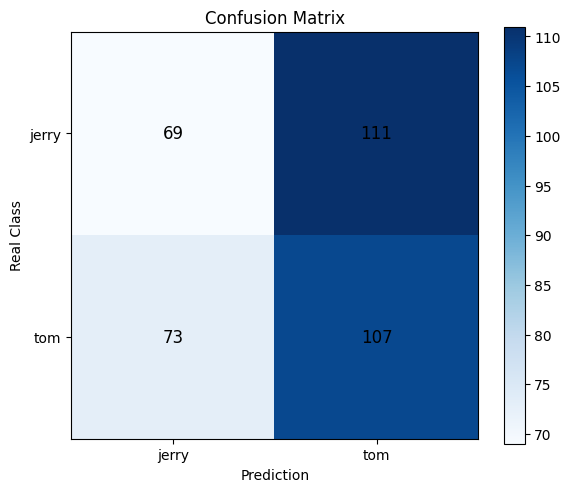


Precisión: 0.491
Recall: 0.594
F1-score: 0.538


In [25]:
classes_new = list(modified_test_generator.class_indices.keys())

print("\nImproved model")
model_analysis2(improved_model, modified_test_generator, class_0=classes_new[0], class_1=classes_new[1])

In [19]:
from tensorflow.keras.preprocessing import image

In [20]:
def interactive_prediction(model, img_path, target_size=(100, 100)):
    
    model = load_model(model)

    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array_expand = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array_expand)[0][0]
    class_name = "Tom" if prediction > 0.5 else " Jerry"

    plt.imshow(img)
    plt.title(f"Predicted: {class_name} (Confidence: {prediction:.4f})")
    plt.axis('off')
    plt.show()

    return class_name

In [21]:
print(os.listdir('./dataset/images/interactive_test'))

['test1.jfif', 'test10.png', 'test2.jfif', 'test3.jpg', 'test4.png', 'test5.jpg', 'test6.png', 'test7.jpg', 'test8.jpg', 'test9.jpg']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


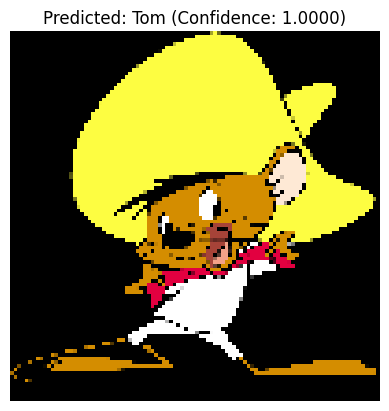

'Tom'

In [36]:
interactive_prediction('improved_model.h5', './dataset/images/interactive_test/test13.png')
